 41%|████      | 1217107/3000000 [02:15<03:18, 8990.00it/s]


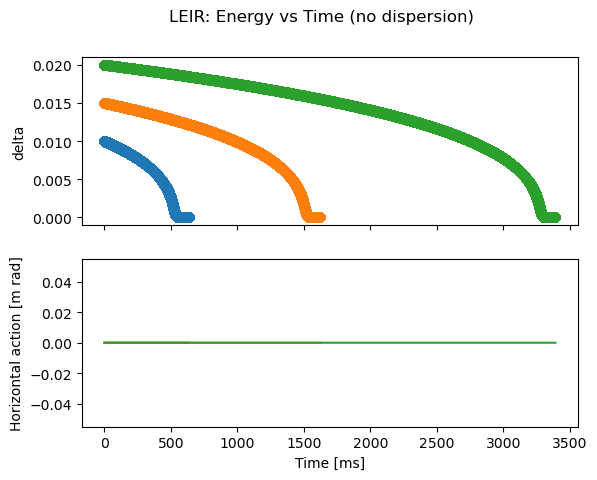

In [19]:
# copyright ############################### #
# This file is part of the Xtrack Package.  #
# Copyright (c) CERN, 2021.                 #
# ######################################### #


import xtrack as xt
import xobjects as xo
import xpart as xp

import ducktrack as dtk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from tqdm import tqdm






beta_rel=0.09405801936973575
gamma = 1.004453024014182

I=0.6
L = 2.5 # m cooler length
r_beam=25*1e-3



T_perp = 0.1 # <E> [eV] = kb*T
T_l =  0.01 # <E> [eV]
B = 0.075 # T for LEIR
B_ratio=1e-10
Z=54

mass0=193729.0248722061*1e6 #eV/c2
c=299792458.0
p0c = mass0*beta_rel*gamma #eV/c

length = 78.54370266 #m
T = length/(c*beta_rel)
ms_per_turn = 1000*T



beta_x=5
beta_y=5
disp_x=0
#disp_x=0
Q_x=5.38518956965
Q_y=5.36921653748

emittance=14*1e-6



arc=dtk.LinearTransferMatrix(Q_x=Q_x/2, Q_y=Q_y/2,
                            beta_x_0=beta_x, beta_x_1=beta_x,
                            beta_y_0=beta_y,  beta_y_1=beta_y,
                            alpha_x_0=0,   alpha_x_1=0,
                            alpha_y_0=0,   alpha_y_1=0,
                            disp_x_0=0,disp_x_1=disp_x,
                            disp_y_0=0,    disp_y_1=0,
                            beta_s=1*1e40,
                            Q_s=0,
                            chroma_x=0.0, chroma_y=0
                                           
                 )


arc2=dtk.LinearTransferMatrix(Q_x=Q_x/2, Q_y=Q_y/2,
                            beta_x_0=beta_x, beta_x_1=beta_x,
                            beta_y_0=beta_y,  beta_y_1=beta_y,
                            alpha_x_0=0,   alpha_x_1=0,
                            alpha_y_0=0,   alpha_y_1=0,
                            disp_x_0=disp_x,disp_x_1=0,
                            disp_y_0=0,    disp_y_1=0,
                            beta_s=1*1e40,
                            Q_s=0,
                            chroma_x=0.0, chroma_y=0
                                           
                 )



num_particles=int(3)
num_turns=int(3e6)
step=1
#x=np.random.normal(0,np.sqrt(5*emittance) ,num_particles),
#px=np.random.normal(0, np.sqrt(emittance/5), num_particles),
#x=np.linspace(1*1e-3, 20*1e-3, num_particles),
#px=np.random.uniform(0, 0, num_particles),

x_initial=np.linspace(-20e-3,20*1e-3,num_particles)
delta_initial=np.linspace(-20e-3,20*1e-3,num_particles)

delta_initial=10*1e-3
delta_values=[10*1e-3,15*1e-3,20*1e-3]

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

for delta_initial in delta_values:

    #x_initial=np.array([-15e-3,-2e-3,15e-3])


    dtk_particle = dtk.TestParticles(
            
            mass0=mass0,
            p0c=p0c,
            x=delta_initial*disp_x*0,
            px=0,
            y=0,
            py=0,
            delta=delta_initial,
            zeta=0)

    dtk_particle_copy_old=dtk_particle.copy()


    dtk_cooler = dtk.elements.ElectronCooler(I=I,L=L,r_beam=r_beam,
                                            T_perp=T_perp,T_l=T_l,
                                            B=B,Z=Z,B_ratio=B_ratio,
                                            Neutralisation_space_charge=0)

        




    x=[]
    px=[]
    action = []
    force = []
    delta = []



    for i in tqdm(range(num_turns)):
        if i % step == 0:

            x.append(dtk_particle.x)
            px.append(dtk_particle.px)
            delta.append(dtk_particle.delta)
        
            action_temp = 0.5*(dtk_particle.x**2/beta_x + beta_x*dtk_particle.px**2) #Joule sec
            action.append(action_temp)

            if dtk_particle.delta <= 1e-8:
                break  # Break out of the loop if delta is <= 0
            
        
        arc.track(dtk_particle)
            
        dtk_cooler.track(dtk_particle)
        arc2.track(dtk_particle)  


    x = np.array(x)
    px = np.array(px)
    action = np.array(action)
    force = np.array(force)
    delta = np.array(delta)

    amplitude_x=np.sqrt(2*action[::1]*beta_x)
    time = np.arange(0, num_turns, step) * ms_per_turn
    time = time[:len(delta)]

    
    
    ax1.scatter(time,delta,label=f'delta={delta_initial}')
    ax2.plot(time, action)



# plot horizontal and vertical action vs time

fig.suptitle('LEIR: Energy vs Time (no dispersion)')


#ax1.plot(time, action_y)
ax1.set_ylabel('delta')

ax2.set_ylabel('Horizontal action [m rad]')
ax2.set_xlabel('Time [ms]')

ax1.ticklabel_format(useOffset=False)
ax2.ticklabel_format(useOffset=False)

plt.show()

with dispersion

 41%|████      | 1217107/3000000 [02:27<03:36, 8234.83it/s]


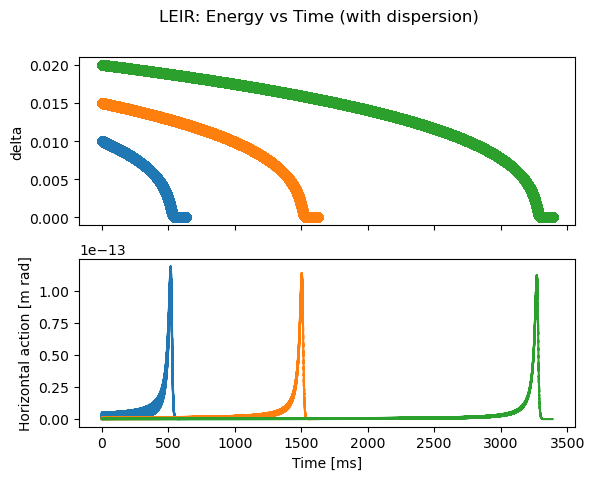

In [20]:
# copyright ############################### #
# This file is part of the Xtrack Package.  #
# Copyright (c) CERN, 2021.                 #
# ######################################### #


import xtrack as xt
import xobjects as xo
import xpart as xp

import ducktrack as dtk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from tqdm import tqdm






beta_rel=0.09405801936973575
gamma = 1.004453024014182

I=0.6
L = 2.5 # m cooler length
r_beam=25*1e-3



T_perp = 0.1 # <E> [eV] = kb*T
T_l =  0.01 # <E> [eV]
B = 0.075 # T for LEIR
B_ratio=1e-10
Z=54

mass0=193729.0248722061*1e6 #eV/c2
c=299792458.0
p0c = mass0*beta_rel*gamma #eV/c

length = 78.54370266 #m
T = length/(c*beta_rel)
ms_per_turn = 1000*T



beta_x=5
beta_y=5
disp_x=-10
#disp_x=0
Q_x=5.38518956965
Q_y=5.36921653748

emittance=14*1e-6



arc=dtk.LinearTransferMatrix(Q_x=Q_x/2, Q_y=Q_y/2,
                            beta_x_0=beta_x, beta_x_1=beta_x,
                            beta_y_0=beta_y,  beta_y_1=beta_y,
                            alpha_x_0=0,   alpha_x_1=0,
                            alpha_y_0=0,   alpha_y_1=0,
                            disp_x_0=0,disp_x_1=disp_x,
                            disp_y_0=0,    disp_y_1=0,
                            beta_s=1*1e40,
                            Q_s=0,
                            chroma_x=0.0, chroma_y=0
                                           
                 )


arc2=dtk.LinearTransferMatrix(Q_x=Q_x/2, Q_y=Q_y/2,
                            beta_x_0=beta_x, beta_x_1=beta_x,
                            beta_y_0=beta_y,  beta_y_1=beta_y,
                            alpha_x_0=0,   alpha_x_1=0,
                            alpha_y_0=0,   alpha_y_1=0,
                            disp_x_0=disp_x,disp_x_1=0,
                            disp_y_0=0,    disp_y_1=0,
                            beta_s=1*1e40,
                            Q_s=0,
                            chroma_x=0.0, chroma_y=0
                                           
                 )



num_particles=int(3)
num_turns=int(3e6)
step=1
#x=np.random.normal(0,np.sqrt(5*emittance) ,num_particles),
#px=np.random.normal(0, np.sqrt(emittance/5), num_particles),
#x=np.linspace(1*1e-3, 20*1e-3, num_particles),
#px=np.random.uniform(0, 0, num_particles),

x_initial=np.linspace(-20e-3,20*1e-3,num_particles)
delta_initial=np.linspace(-20e-3,20*1e-3,num_particles)

delta_initial=10*1e-3
delta_values=[10*1e-3,15*1e-3,20*1e-3]

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

for delta_initial in delta_values:

    #x_initial=np.array([-15e-3,-2e-3,15e-3])


    dtk_particle = dtk.TestParticles(
            
            mass0=mass0,
            p0c=p0c,
            x=delta_initial*disp_x*0,
            px=0,
            y=0,
            py=0,
            delta=delta_initial,
            zeta=0)

    dtk_particle_copy_old=dtk_particle.copy()


    dtk_cooler = dtk.elements.ElectronCooler(I=I,L=L,r_beam=r_beam,
                                            T_perp=T_perp,T_l=T_l,
                                            B=B,Z=Z,B_ratio=B_ratio,
                                            Neutralisation_space_charge=0)

        




    x=[]
    px=[]
    action = []
    force = []
    delta = []



    for i in tqdm(range(num_turns)):
        if i % step == 0:

            x.append(dtk_particle.x)
            px.append(dtk_particle.px)
            delta.append(dtk_particle.delta)
        
            action_temp = 0.5*(dtk_particle.x**2/beta_x + beta_x*dtk_particle.px**2) #Joule sec
            action.append(action_temp)

            if dtk_particle.delta <= 1e-8:
                break  # Break out of the loop if delta is <= 0
            
        
        arc.track(dtk_particle)
            
        dtk_cooler.track(dtk_particle)
        arc2.track(dtk_particle)  


    x = np.array(x)
    px = np.array(px)
    action = np.array(action)
    force = np.array(force)
    delta = np.array(delta)

    amplitude_x=np.sqrt(2*action[::1]*beta_x)
    time = np.arange(0, num_turns, step) * ms_per_turn
    time = time[:len(delta)]

    
    
    ax1.scatter(time,delta,label=f'delta={delta_initial}')
    ax2.plot(time, action)



# plot horizontal and vertical action vs time
fig.suptitle('LEIR: Energy vs Time (with dispersion)')


#ax1.plot(time, action_y)
ax1.set_ylabel('delta')

ax2.set_ylabel('Horizontal action [m rad]')
ax2.set_xlabel('Time [ms]')

ax1.ticklabel_format(useOffset=False)
ax2.ticklabel_format(useOffset=False)
plt.show()


